In [25]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import PIL


In [29]:

def assignlabel(x1,x2,image,label_map):
    #x1 et x2 contiennent les coordonnées des points appellés
    #dist < 100 lie inter et ext 50 annule en gardant int homogène
    if label_map[x2] == 0 and dist(x1,x2,image)<100:
        label_map[x2]=label_map[x1]
        labelize_neighboors(x2,image,label_map)
    return label_map


def dist(x1,x2,image):
    #x1 et x2 contiennent les coordonnées des points appellés
    #image est l'image en question
    #dist renvoie la distance entre les deux points
    return np.sqrt((image[x1][0]-image[x2][0])**2+(image[x1][1]-image[x2][1])**2+(image[x1][2]-image[x2][2])**2)

def labelize_neighboors(point,image,label_map):
    width=image.shape[1]
    height=image.shape[0]
    x=point[0]
    y=point[1]
    if label_map[(x+1)%height,y]==0:
        label_map = assignlabel((x,y),((x+1)%height,y),image,label_map)
    if label_map[(x-1)%height,y]==0:
        label_map = assignlabel((x,y),((x-1)%height,y),image,label_map)
    if label_map[x,(y+1)%width]==0:
        label_map = assignlabel((x,y),(x,(y+1)%width),image,label_map)
    if label_map[x,(y-1)%width]==0:
        label_map=assignlabel((x,y),(x,(y-1)%width),image,label_map)
    if label_map[(x+1)%height,(y+1)%width]==0:
        label_map=assignlabel((x,y),((x+1)%height,(y+1)%width),image,label_map)
    if label_map[(x-1)%height,(y-1)%width]==0:
        label_map=assignlabel((x,y),((x-1)%height,(y-1)%width),image,label_map)
    if label_map[(x+1)%height,(y-1)%width]==0:
        label_map=assignlabel((x,y),((x+1)%height,(y-1)%width),image,label_map)
    if label_map[(x-1)%height,(y+1)%width]==0:
        label_map=assignlabel((x,y),((x-1)%height,(y+1)%width),image,label_map)

def labelize(image,label_map):
    width=image.shape[1]
    height=image.shape[0]
    label=1
    for x in range(height):
        for y in range(width):
            if label_map[x,y]==0:
                label+=1
                label_map[x,y]=label
                labelize_neighboors((x,y),image,label_map)


    return label_map



C:\Users\zroun\AppData\Local\Temp\ipykernel_14884\3385314733.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  return np.sqrt((image[x1][0]-image[x2][0])**2+(image[x1][1]-image[x2][1])**2+(image[x1][2]-image[x2][2])**2)


OSError: cannot write mode RGBA as JPEG

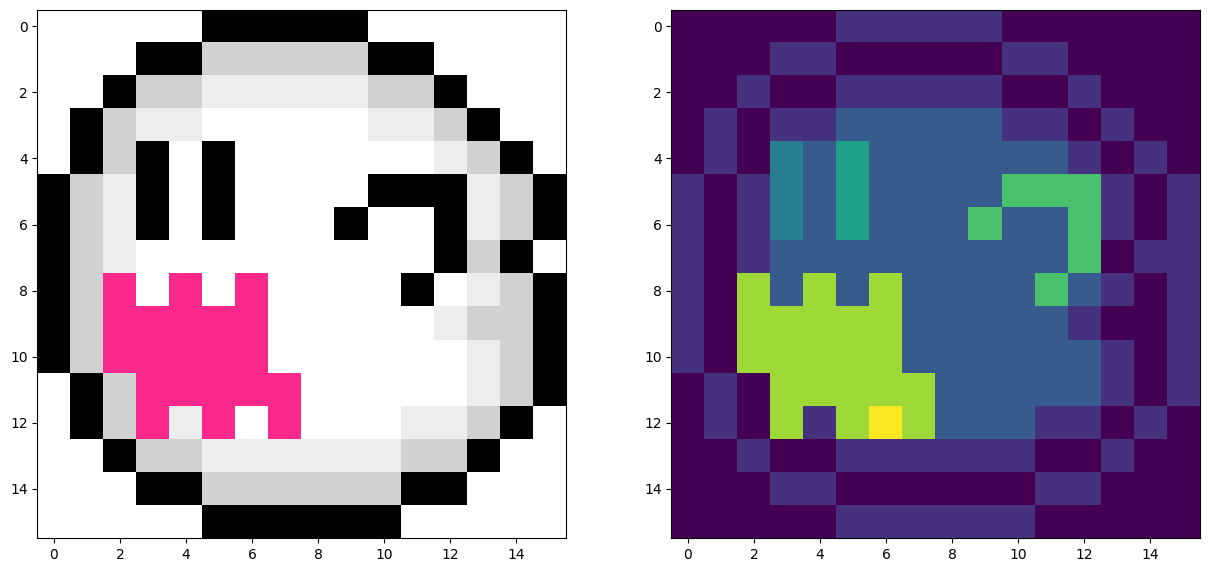

In [40]:

image1 = Image.open("boo.png")
image = np.array(image)

pixel_size=4

#On divise la taille de l'image par 4*4 en gardant la valeur d'un point correspondant car l'image est en 64*64 pour 16*16 pixels
width, height, _ = image.shape
selection_matrix= np.zeros((width, int(height/pixel_size)))
for i in range(width):
    for j in range(int(height/pixel_size)):
        if i==pixel_size*j :
            selection_matrix[i, j] = 1
image_resized=np.zeros((int(width/pixel_size), int(height/pixel_size),4))
for k in range(4):
    image_resized[: , :, k  ] = np.dot(np.transpose(selection_matrix),np.dot(image[:,:, k ],selection_matrix))

image_resized=image_resized.astype(np.uint8)
labels=np.zeros(image_resized.shape[:2])
labels = labelize(image_resized,labels)

#subplot qui affiche l'image et l'image en16*16 pixels
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.subplot(1, 2, 2)
plt.imshow(labels)
im= Image.fromarray(image_resized)
im.save("boo16_16.png")






0 4 1 1
0 5 1 -1
0 9 1 1
0 10 1 -1
1 2 1 1
1 3 1 -1
1 4 -1 1
1 5 -1 -1
1 9 -1 1
1 10 -1 -1
1 11 1 1
1 12 1 -1
2 1 1 1
2 2 -1 1
2 2 1 -1
2 3 -1 -1
2 11 -1 1
2 12 -1 -1
2 12 1 1
2 13 1 -1
3 1 -1 1
3 2 -1 -1
3 12 -1 1
3 13 -1 -1
3 13 1 1
3 14 1 -1
4 0 1 1
4 1 1 -1
4 13 -1 1
4 14 -1 -1
4 14 1 1
4 15 1 -1
5 0 -1 1
5 1 -1 -1
5 9 1 1
5 10 1 -1
5 14 -1 1
5 15 -1 -1
6 9 -1 1
6 10 -1 -1
6 14 1 1
6 15 1 -1
7 11 1 1
7 12 1 -1
7 14 -1 1
7 14 1 1
7 15 -1 -1
7 15 1 -1
8 11 -1 1
8 12 -1 -1
8 14 -1 1
8 15 -1 -1
10 0 1 1
10 1 1 -1
11 0 -1 1
11 1 -1 -1
11 14 1 1
11 15 1 -1
12 1 1 1
12 2 1 -1
12 13 1 1
12 14 -1 1
12 14 1 -1
12 15 -1 -1
13 1 -1 1
13 2 -1 -1
13 2 1 1
13 3 1 -1
13 12 1 1
13 13 -1 1
13 13 1 -1
13 14 -1 -1
14 2 -1 1
14 3 -1 -1
14 4 1 1
14 5 1 -1
14 10 1 1
14 11 1 -1
14 12 -1 1
14 13 -1 -1
15 4 -1 1
15 5 -1 -1
15 10 -1 1
15 11 -1 -1


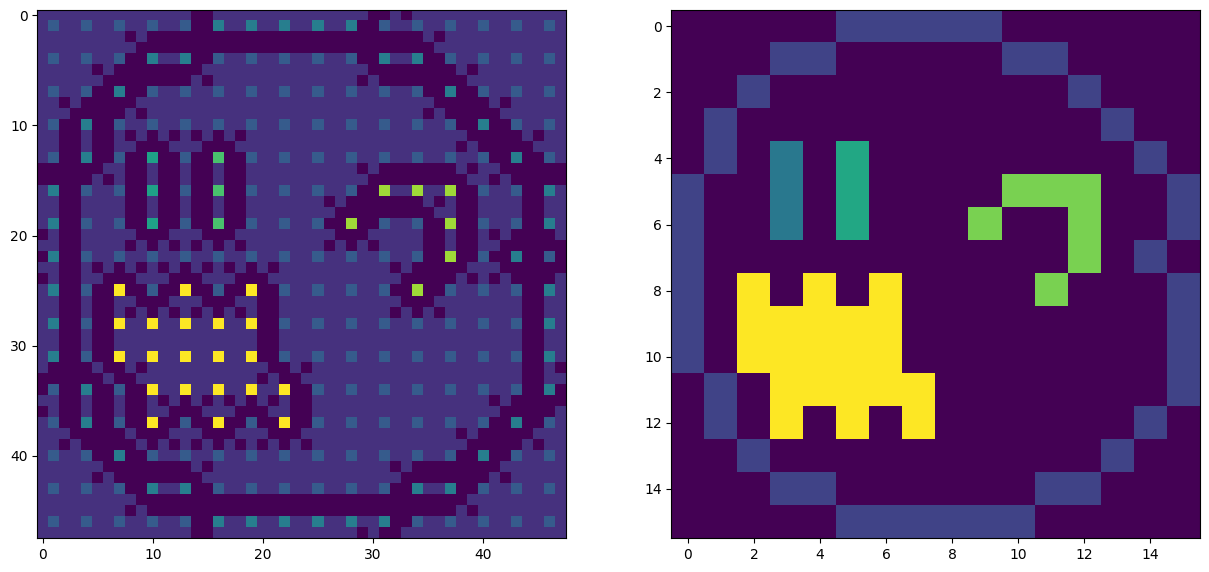

In [21]:
width, height= np.shape(labels)
links=[]

#Fonction de vérification de la longueur des ensembles associés dans le cas de deux diagonales intercroisées pour un point lors de la création de la matrice de liens
def checklinkstrength(labels,i,j,u,v):
    #dans un premier temps on va compter le nombre de points appartennant aux deux ensembles.

    


#On créé une liste de m*n contenant des matrices 3*3 dans lesquels on a au centre le label du point correspondant et autour un boléen indiquant la présence de liens avec les voisins
def create_links(labels):
    width, height= np.shape(labels)
    links=np.full((width,height,3,3), 0)
    for i in range(width):
        for j in range(height):
            
            links[i,j][1,1]=labels[i,j]


    for i in range(width):
       for j in range(height):
            for u in range(-1,2):
                for v in range(-1,2):
                    #si les labels des pixel et du voisin u,v sont les mêmes
                    if links[i,j][1,1]==links[(i+u)%width,(j+v)%height][1,1] and not (u==0 and v==0):

                        #Condition de vérification en cas d'entrecroisements de zones 
                        if np.abs(u)==np.abs(v) and (links[(i+u)%width,j][1,1]==links[i,(j+v)%height][1,1] and links[(i+u)%width,j][1,1]!=links[i,j][1,1]):
                           links[i,j][u+1,v+1]=checklinkstrength(labels,i,j,u,v)
                        else:   #On affecte la valeur 1 (il y a une ligne)
                            links[i,j][u+1,v+1]=1
                            
    return links

links=create_links(labels)

#On affiche les liens
links_shown=np.zeros((3*width,3*height))

for i in range(width):
    for j in range (height):
        for u in range(-1,2):
            for v in range(-1,2):
                links_shown[(3*i+u+1)%(3*width),(3*j+v+1)%(3*height)]=links[i,j][u+1,v+1]


plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(links_shown)
plt.subplot(1, 2, 2)
plt.imshow(labels)
